In [9]:
#FileName: Loan_Model.ipynb
#Author: Kyle C Larson
#Objective

#Which variables are most significant.
#Which segment of customers should be targeted more.
#To predict whether a liability customer will buy a personal loan or not.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#chose the file to read
file_str = "Loan_Modelling.csv"
loan_data = pd.read_csv(file_str)
df_PLoan_y, df_PLoan_n = [x for _, x in loan_data.groupby(loan_data['Personal_Loan'] == 0)]
df_PLoan_y.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [10]:
df_PLoan_y.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [11]:
df_PLoan_n.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93170.961947,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,1759.665659,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [12]:
df_PLoan_n.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Two sample t-test for comparing mean
import numpy as np
import scipy.stats as st
#Lets define some useful stats quantities for analysis
def ssdev(X):
    xbar = np.mean(X)
    ssd =( sum([(x-xbar)**2 for x in X]) / (len(X)-1) )**.5
    return ssd
def tstat(xb1, xb2, ss1, ss2, n1, n2):
    SE = (ss1**2/n1 + ss2**2/n2)**.5
    ts = (xb1 - xb2)/SE
    return ts
def twos_twotail_ttest(Samp1, Samp2, sig):
    x_bar_1 = np.mean(Samp1)
    x_bar_2 = np.mean(Samp2)
    ssdev_1 = ssdev(Samp1)
    ssdev_2 = ssdev(Samp2)
#the degrees of freedom is the smaller of the two n1-1 and n2-1
    df_12 = min(len(Samp1), len(Samp2)) -1
    #print the critical values designating the ending and beginning of rejection region
    print(st.t.interval(alpha=(1-sig), df=df_yn, loc=0, scale=1) )
#lastly, calculate the t-stsat
    t_AGE = tstat(x_bar_1, x_bar_2, ssdev_1, ssdev_2, len(Samp1), len(Samp2))
    print(t_AGE)

In [58]:
#Cheby shevs interval (for when the data are not normally distributed)
# at least 1-1/k**2 of the data lie within k standard deviations of the mean
def chebyshevs_interval(Samp, sig):
    x_bar = np.mean(Samp)
    ss = ssdev(Samp)
    k = (1-sig)**-.5
    upper = x_bar + k*ss
    lower = x_bar - k*ss
    return [lower, upper]

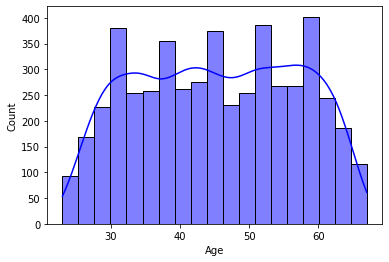

In [22]:
#Age Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(loan_data['Age'], kde=True, color='blue')

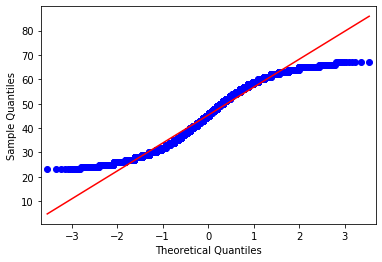

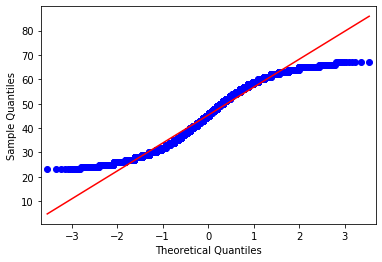

In [23]:
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(loan_data['Age']).qqplot(line='s')

In [50]:
#Ages can be assumed to be independent of one another
#H0 : mean age is the same between loan status 
#H1 : mean age is different between loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Age'], df_PLoan_n['Age'], .05)
#because the t-stat falls inside the region, we fail to reject the null that the mean ages between
#accept and decline groups is not different

(-1.9649288589986715, 1.9649288589986715)
-0.5408324971563381


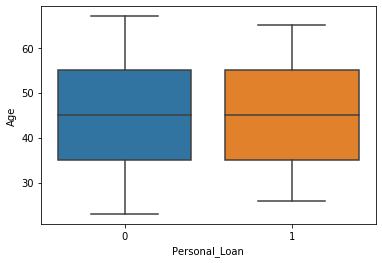

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
#Age vs Personal_Loan
ax = sns.boxplot(x="Personal_Loan", 
            y="Age", 
            data=loan_data)

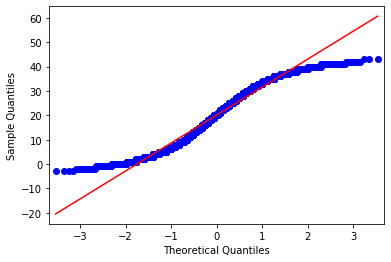

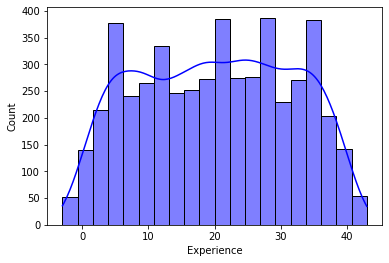

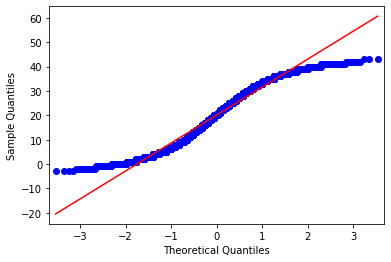

In [51]:
#Experience Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(loan_data['Experience'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(loan_data['Experience']).qqplot(line='s')

In [52]:
#Experienc can be assumed to be independent of one another
#H0 : mean exp is the same between loan status 
#H1 : mean exp is different between loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Experience'], df_PLoan_n['Experience'], .05)
#Because the t-stat falls inside the region, we fail to reject the null that the mean exp between
#accept and decline groups is not different

(-1.9649288589986715, 1.9649288589986715)
-0.5194907327498328


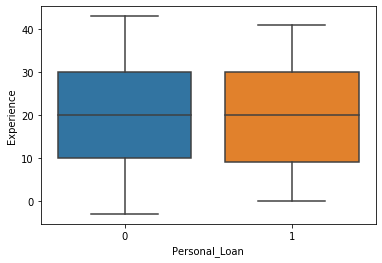

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Experience", 
            data=loan_data)

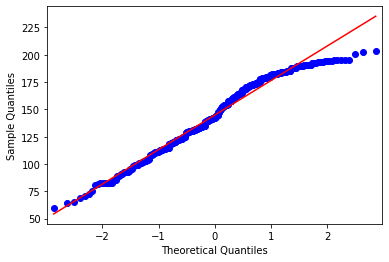

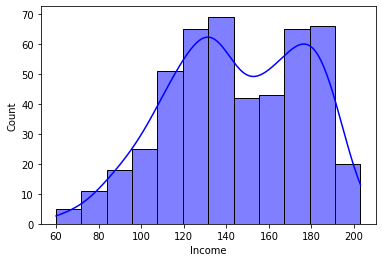

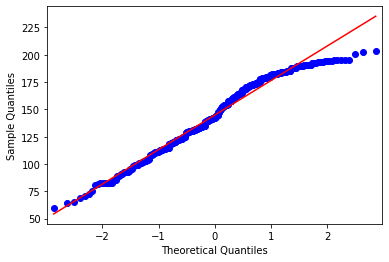

In [55]:
#Income Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(df_PLoan_y['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(df_PLoan_y['Income']).qqplot(line='s')

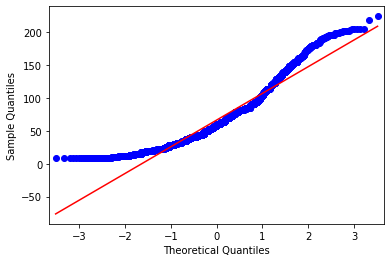

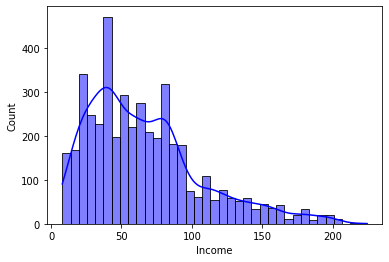

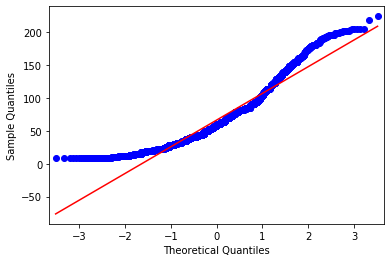

In [56]:
#Income (Failed) Normality Check (the data are not approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(df_PLoan_n['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(df_PLoan_n['Income']).qqplot(line='s')

In [69]:
#Chevy Chevs
#based on the assumption the incomes are independent (which they could be if sampled randomly enough)
#if the range of Historical P Loan users falls inside the CC income interval, 
#we cannot conclude that income makes a difference
print(chebyshevs_interval(df_PLoan_y['Income'], .75))
print([min(df_PLoan_n['Income']), max(df_PLoan_n['Income'])])

[81.57697445428816, 207.9146922123785]
[8, 224]


In [62]:
#Does this hold true when outliers are removed?
#Outlier Cutoffs
#It is more useful to visualize and analyze
income_75ile = df_PLoan_n['Income'].describe()['75%']
income_25ile = df_PLoan_n['Income'].describe()['25%']
and_half_IQR = (income_75ile - income_25ile )*1.5
cutoffs = [income_25ile-and_half_IQR, income_75ile+and_half_IQR]

print("Outliers fall below:")

print(cutoffs[0])
print("Outliers extend above:")
print(cutoffs[1]) 
#the only relevant cutoff is the upper as reflected by the right skew

Outliers fall below:
-38.5
Outliers extend above:
157.5


In [64]:
#getting rid of the outliers:
outliers, PLoan_n_minus_outliers= [x for _, x in df_PLoan_n.groupby(df_PLoan_n['Income'] < cutoffs[1])]

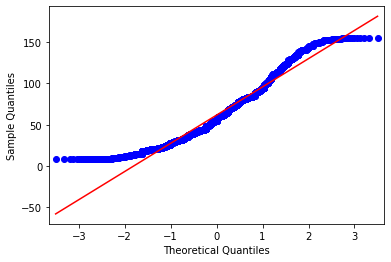

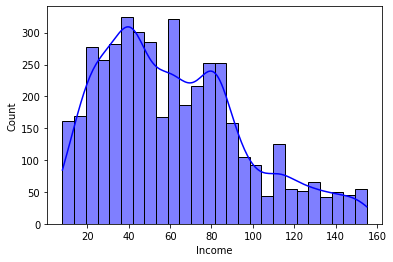

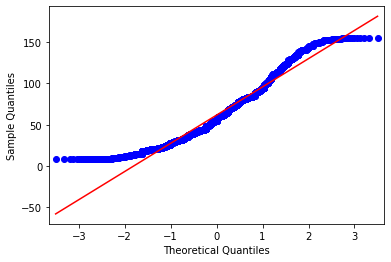

In [66]:
#rechecking normality
#Income Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(PLoan_n_minus_outliers['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(PLoan_n_minus_outliers['Income']).qqplot(line='s')

In [67]:
#Income can be assumed to be roughly normal and independent of one another
#H0 : mean income is the same between historical loan status 
#H1 : mean income is different between historical loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Income'], PLoan_n_minus_outliers['Income'], .05)
#because the t-stat falls outside the region, we reject the null that the mean exp between
#accept and decline groups is not different. There is sufficient evidence they're different.

(-1.9649288589986715, 1.9649288589986715)
54.24198448792328
